In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

# 데이터 시각화
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 가설검정
from scipy import stats

# 경고문구 무시
import warnings
warnings.filterwarnings("ignore")
# 자연어 처리
# import spacy

# 정규화
from sklearn.preprocessing import MinMaxScaler

#표준화
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# counter
from collections import Counter

# 데이터 정보 확인

In [2]:
df=pd.read_csv('3.1_original_useDf_0714.csv')
df.head(1)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount
0,0,thequeensgambit,44867,TV,United States,Drama,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36


In [3]:
# 결측치 확인
df.isnull().sum()

Num                  0
Title                0
Value                0
Series or Movie      0
originCountry      206
Genre              370
country_all          0
countryCount         0
dtype: int64

In [4]:
df.describe().round()

,Num,Value,countryCount
count,2960.0,2960.0,2960.0
mean,1480.0,634.0,16.0
std,855.0,2202.0,14.0
min,0.0,1.0,1.0
25%,740.0,22.0,3.0
50%,1480.0,80.0,10.0
75%,2219.0,321.0,35.0
max,2959.0,44867.0,37.0


# viewpoint 정규화 

## min-max 정규화 

In [5]:
min_max_scaler = MinMaxScaler()
value = df[['Value','countryCount']].values

#df['Value_std'] = min_max_scaler.fit_transform(value.reshape(-1,1))
df[['Value_std','countryCount_std']] = min_max_scaler.fit_transform(value)

df.head(1)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount,Value_std,countryCount_std
0,0,thequeensgambit,44867,TV,United States,Drama,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,1.0,0.972222


In [6]:
df.describe()

,Num,Value,countryCount,Value_std,countryCount_std
count,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000
mean,1479.500000,633.733446,16.180405,0.014103,0.421678
std,854.622724,2202.145547,14.071531,0.049083,0.390876
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,739.750000,22.000000,3.000000,0.000468,0.055556
50%,1479.500000,80.000000,10.000000,0.001761,0.250000
75%,2219.250000,321.000000,35.000000,0.007132,0.944444
max,2959.000000,44867.000000,37.000000,1.000000,1.000000


## 표준화 실시

In [7]:
scaler = StandardScaler()
value2=df[['Value_std','countryCount_std']].values

df[['Value_norm','countryCount_norm']] = scaler.fit_transform(value2)

df.head(1)

,Num,Title,Value,Series or Movie,originCountry,Genre,country_all,countryCount,Value_std,countryCount_std,Value_norm,countryCount_norm
0,0,thequeensgambit,44867,TV,United States,Drama,"['Argentina', 'Australia', 'Belgium', 'Brazil'...",36,1.0,0.972222,20.089835,1.408727


In [8]:
df.describe()

,Num,Value,countryCount,Value_std,countryCount_std,Value_norm,countryCount_norm
count,2960.000000,2960.000000,2960.000000,2960.000000,2960.000000,2.960000e+03,2.960000e+03
mean,1479.500000,633.733446,16.180405,0.014103,0.421678,6.420915e-16,2.709357e-16
std,854.622724,2202.145547,14.071531,0.049083,0.390876,1.000169e+00,1.000169e+00
min,0.000000,1.000000,1.000000,0.000000,0.000000,-2.873744e-01,-1.078985e+00
25%,739.750000,22.000000,3.000000,0.000468,0.055556,-2.778367e-01,-9.368300e-01
50%,1479.500000,80.000000,10.000000,0.001761,0.250000,-2.514943e-01,-4.392876e-01
75%,2219.250000,321.000000,35.000000,0.007132,0.944444,-1.420371e-01,1.337649e+00
max,2959.000000,44867.000000,37.000000,1.000000,1.000000,2.008983e+01,1.479804e+00


# kind of producing countries 와 viewpoint

## df_country

In [9]:
df_country = df[['Value','originCountry']]

In [10]:
df_country.head(1)

,Value,originCountry
0,44867,United States


## null값 확인 및 제거 

In [11]:
df_country.isnull().sum()

Value              0
originCountry    206
dtype: int64

In [12]:
df_country = df_country.dropna(subset=['originCountry'])
df_country=df_country.reset_index()

In [13]:
df_country.tail(5)

,index,Value,originCountry
2749,2955,1,United States
2750,2956,1,United States
2751,2957,1,United States
2752,2958,1,United States
2753,2959,1,United States


In [14]:
# 컬럼값 변경
df_country=df_country[['Value','originCountry']]
df_country

,Value,originCountry
0,44867,United States
1,42149,Poland
2,27138,United States
3,25729,United States
4,23480,United States
...,...,...
2749,1,United States
2750,1,United States
2751,1,United States
2752,1,United States


In [15]:
# 결측치 확인
df_country.isnull().sum()

Value            0
originCountry    0
dtype: int64

# Which country produces the most Contents?

## 2020 넷플릭스 컨텐츠 인기순위 생산국가 (종합) 

In [29]:
view_all = df_country
view_all

,Value,originCountry
0,44867,United States
1,42149,Poland
2,27138,United States
3,25729,United States
4,23480,United States
...,...,...
2749,1,United States
2750,1,United States
2751,1,United States
2752,1,United States


### 생산 국가별 영화 제작 수

#### conter_viewAll 변수 생성

In [30]:
# 생산국가의 빈도수 세기
counter_viewAll=view_all.originCountry.value_counts()
counter_viewAll

United States     1570
United Kingdom     177
Japan              126
South Korea        108
India               82
                  ... 
Luxembourg           1
Cyprus               1
Angola               1
Bangladesh           1
Zimbabwe             1
Name: originCountry, Length: 65, dtype: int64

#### Series를 DataFrame으로 변경 

In [37]:
counter_all=counter_viewAll.rename_axis('originCountry').reset_index(name='counts')
counter_viewAll=counter_all
counter_viewAll

TypeError: reset_index() got an unexpected keyword argument 'name'

In [38]:
counter_viewAll.head(10)

,originCountry,counts
0,United States,1570
1,United Kingdom,177
2,Japan,126
3,South Korea,108
4,India,82
5,France,73
6,Canada,52
7,Spain,43
8,Turkey,39
9,Philippines,39


In [34]:
tot = sum(counter_viewAll.counts)
top10 = sum(counter_viewAll.counts[:10]) 

print(f'total : {tot}')
print(f'top 10 countries : {top10}')
print(f'percentage : {top10}/{tot} = {100 * top10/tot}')

total : 2754
top 10 countries : 2309
percentage : 2309/2754 = 83.84168482207699


####  인기 순위 전체 분석 insight

전체 작품수 2754개 중에 영화 제작을 많이 하는 top10위 권의 나라가 2309개를 만들어, 순위권의 83프로를 생산하고 있다.
제작 건수가 많은 top10 countries는 미국, 영국, 일본, 한국, 인도, 프랑스. 케나다, 스페인, 터키, 필리핀이 포함된다.

### 전체 영화 제작 국가 top 10위 시각화 

In [42]:
df_all = counter_viewAll[:][:10]

In [214]:
values=df_all['counts']
labels = df_all['originCountry']

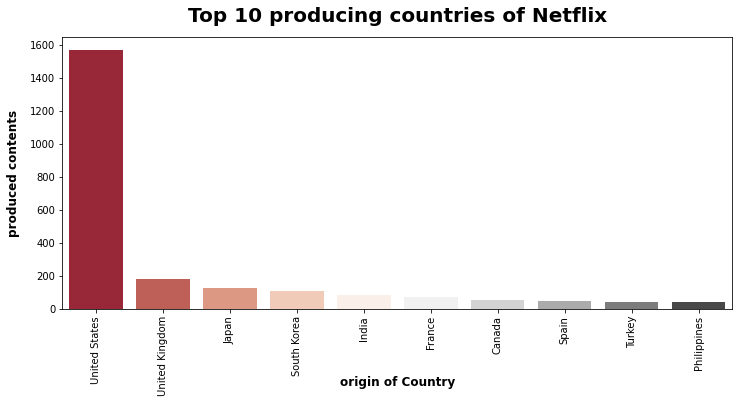

In [295]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(df_all['originCountry'], df_all['counts'], ax=ax, palette="RdGy")
ax.set_xticklabels(df_all['originCountry'], rotation='90', fontsize = 13)
ax.set_title('Top 10 producing countries of Netflix', fontsize=20, fontweight='bold', pad = 15)
plt.xlabel('origin of Country', fontsize=12, labelpad=-20, fontweight='bold')
plt.ylabel('produced contents', fontsize=12, labelpad=10, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
# def make_autopct(values):
#     def my_autopct(pct):
#         total = sum(values)
#         val = int(round(pct*total/100.0))
#         return '{p:.2f}%({v:d})'.format(p=pct,v=val)
#     return my_autopct

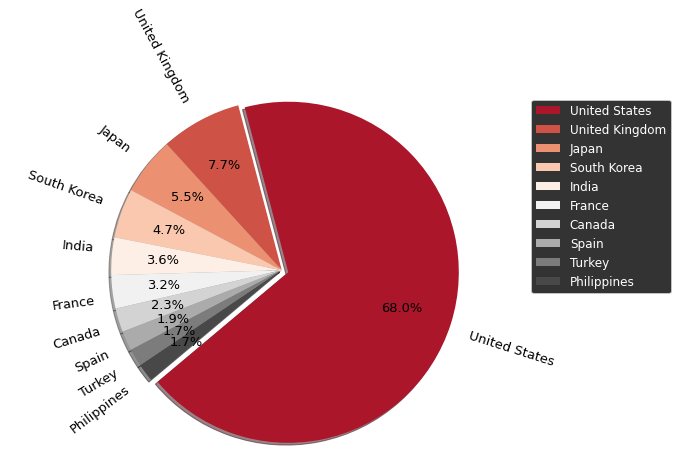

In [288]:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(nrows=1, ncols=1)


explode = [0 for _ in range(10)]
explode[0] = 0.06

ax2 = plt.subplot(gs[0])
ax2.pie(df_all['counts'], labels=df_all['originCountry'],
        shadow=True, startangle=220, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=10),textprops={'fontsize':13},
        pctdistance=0.7, labeldistance=1.1,rotatelabels=True,
        autopct = '%1.1f%%', radius=1.5
       )


ax2.axis('equal') 
ax2.legend(loc='right', fontsize = 12, facecolor = 'black', labelcolor= 'white', bbox_to_anchor=(1.2,0.7))
plt.show()

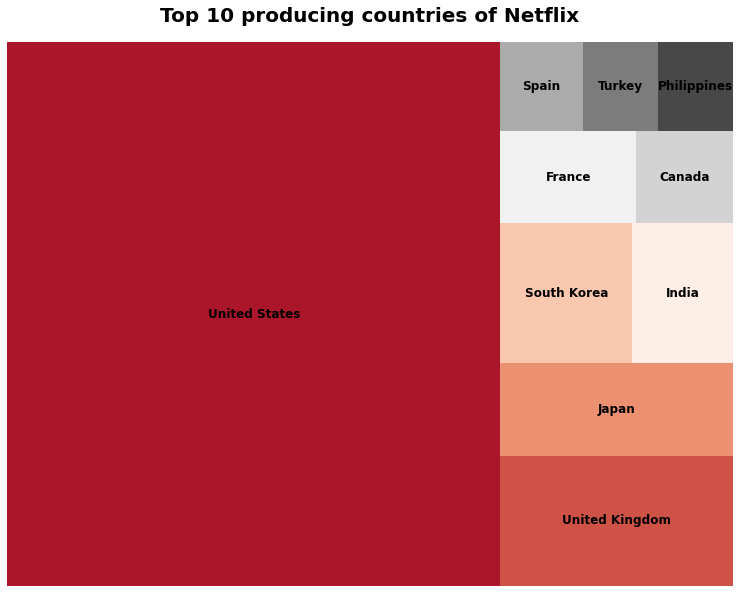

In [301]:
import squarify

fig = plt.figure(figsize=(13,10))
squarify.plot(sizes = values, label = labels, color=sns.color_palette("RdGy", n_colors=10),
             linewidth=4, text_kwargs={'fontsize':12, 'fontweight' : 'bold'})
plt.title('Top 10 producing countries of Netflix', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold', pad=20)
plt.axis('off')
plt.show()

In [387]:
from pywaffle import Waffle
from pywaffle.fontawesome_mapping import icons

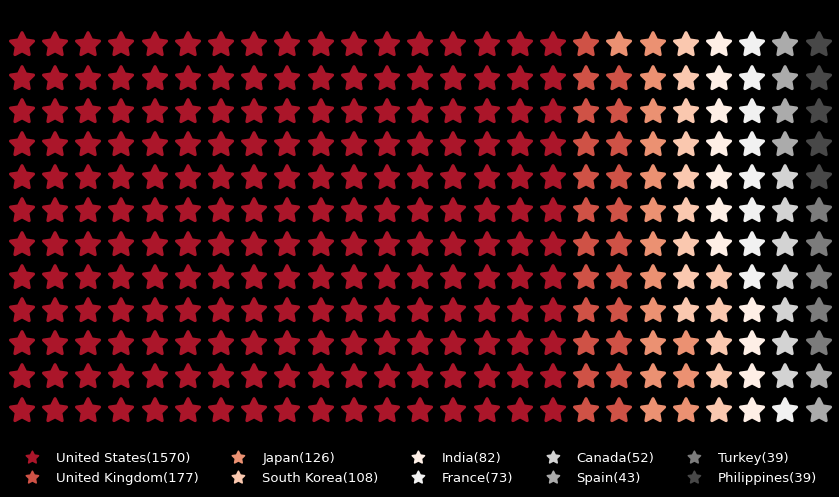

In [391]:
fig = plt.figure(
    FigureClass=Waffle,facecolor='black', 
    rows=12, 
    columns=25, 
    values=df_all['counts'],
    labels=["{}({})".format(a, b) for a, b in zip(labels, values)],
    colors=sns.color_palette("RdGy", n_colors=10),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 
            'ncol': len(df_all['counts'])//2,  'framealpha': 0, 'labelcolor': 'white', 'fontsize':13.2}, 
    font_size=25,
    figsize=(13, 13),
    icons="star",
    #characters='N',
    icon_legend=True)

plt.title('Top 10 producing countries of Netflix', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()

## 2020 넷플릭스 컨텐츠 인기 순위 100위의 생산국가 

### view_top100 변수 생성 

In [16]:
view_top100 = df_country[:][:100]
view_top100.tail(5)

,Value,originCountry
95,4459,France
96,4356,United States
97,4285,Germany
98,4267,United States
99,4233,United States


### 인기 순위 100위까지 생산국가 별 제작 영화 수 
#### counter_view100 변수 생성

In [24]:
# 생산국가의 빈도수 세기
counter_view100=view_top100.originCountry.value_counts()
counter_view100

United States     69
United Kingdom     7
South Korea        5
Spain              4
Colombia           3
France             3
Canada             2
Germany            2
Italy              1
Mexico             1
China              1
Poland             1
Russia             1
Name: originCountry, dtype: int64

In [25]:
type(counter_view100)

pandas.core.series.Series

#### Series를 dataFrame으로 변경

In [26]:
counter_100=counter_view100.rename_axis('originCountry').reset_index(name='counts')
counter_view100=counter_100
counter_view100

,originCountry,counts
0,United States,69
1,United Kingdom,7
2,South Korea,5
3,Spain,4
4,Colombia,3
5,France,3
6,Canada,2
7,Germany,2
8,Italy,1
9,Mexico,1


### 인기순위 100위 분석 insight

In [213]:
tot = sum(counter_view100.counts)
top5 = sum(counter_view100.counts[:5]) 

print(f'total : {tot}')
print(f'top 5 countries : {top5}')
print(f'percentage : {top5}/{tot} = {100 * top5/tot}')

total : 100
top 5 countries : 88
percentage : 88/100 = 88.0


1. 인기 순위 100위 중에 south korea의 작품이 5건이 포함되어 있다.
2. 일본은 순위권에 포함되지도 못했다. 
3. 전체 2754개의 영화중에 korea 출신의 작품은 108개로 다소 적은 편이지만, top 100에는 5개나 포함되어 있어서 
4. 그 인기를 실감할 수 있다.
5. 반면 일본은 126건을 생산했지만 100위 안에는 1개도 안포함되어 있다. 이런 스타일의 작품은 안통하는 것 같다 ㅋㅋ

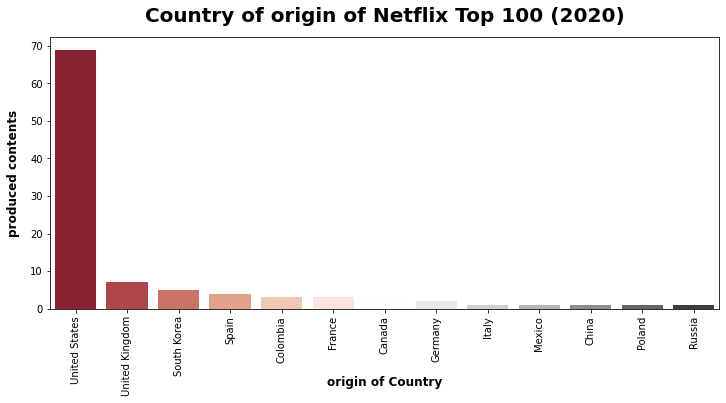

In [240]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=1)

ax = plt.subplot(gs[0])
sns.barplot(counter_view100['originCountry'], counter_view100['counts'], ax=ax, palette="RdGy")
ax.set_xticklabels(counter_view100['originCountry'], rotation='90', fontsize = 13)
ax.set_title('Country of origin of Netflix Top 100 (2020)', fontsize=20, fontweight='bold', pad = 15)
plt.xlabel('origin of Country', fontsize=12, labelpad=-20, fontweight='bold')
plt.ylabel('produced contents', fontsize=12, labelpad=10, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

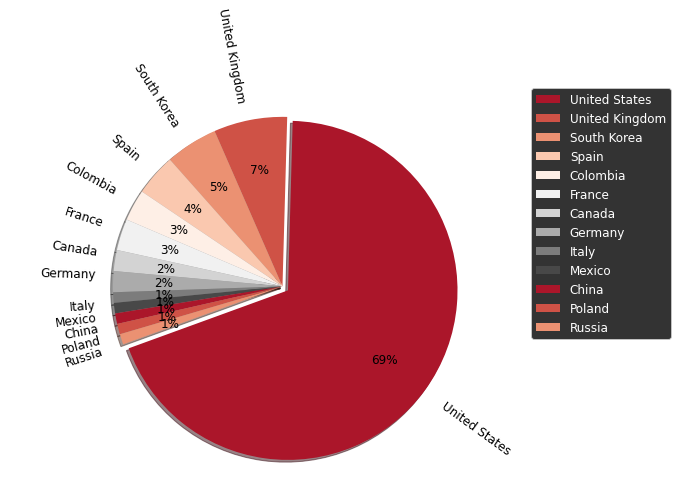

In [290]:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(nrows=1, ncols=1)


explode = [0 for _ in range(len(counter_view100['originCountry']))]
explode[0] = 0.06

ax2 = plt.subplot(gs[0])
ax2.pie(counter_view100['counts'], labels=counter_view100['originCountry'],
        shadow=True, startangle=200, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=10),textprops={'fontsize':12},
        pctdistance=0.7, labeldistance=1.1,rotatelabels=True,
        autopct = '%1.0f%%', radius=1.5
       )


ax2.axis('equal') 
ax2.legend(loc='right', fontsize = 12, facecolor = 'black', labelcolor= 'white', bbox_to_anchor=(1.2,0.7))
plt.show()

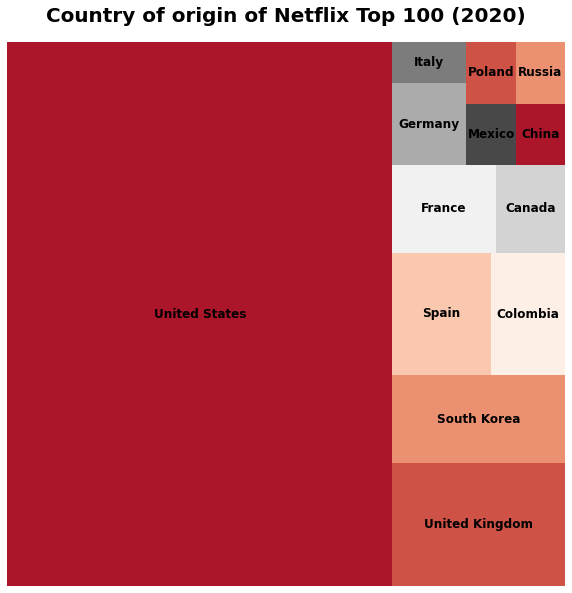

In [298]:
import squarify

fig = plt.figure(figsize=(10,10))
squarify.plot(counter_view100['counts'], label = counter_view100['originCountry'], color=sns.color_palette("RdGy", n_colors=10),
             linewidth=4, text_kwargs={'fontsize':12, 'fontweight' : 'bold'})
plt.title('Country of origin of Netflix Top 100 (2020)', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold', pad=20)
plt.axis('off')
plt.show()